In [20]:
import tensorflow
from keras.datasets import imdb

In [21]:
(x_train,y_train),(x_test,y_test)=imdb.load_data()

#load dataset

In [22]:
print(x_train.shape)
print(x_train[:1])

(25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])]


In [23]:
y_train[0]

1

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


* as we know variable shape of input is not valid in any Neural Network, so we have to reshape it by adding 0 value in prefix or in postfix and make them unishape.
* This functionality is achived by pad_sequences function provided by keras library avilable in utils class.
* you can see [2,3] have (1,2) shape where as [6] have (1,1) shape.
* pad_sequences make their shape to [1,2] as maximum array/text length is 2

In [25]:
from keras.utils import pad_sequences
x_train=pad_sequences(x_train,padding='post',maxlen=25)
x_test=pad_sequences(x_test,padding='post',maxlen=25)

#unishaping

In [26]:
x_train.shape

(25000, 25)

In [27]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

#importing Sequential model,SimpleRNN layer and Dense layer from keras

In [28]:
model=Sequential()

model.add(SimpleRNN(32,return_sequences=False,input_shape=(25,1)))
model.add(Dense(1,activation='sigmoid'))

model.summary()

#RNN architecture
#32 is the no of nodes
#retrun_sequences=False means intermediate output is not required
#input shape=shape of one review

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#model compile

In [30]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.3)

#model training

Epoch 1/10
547/547 [==============================] - 12s 20ms/step - loss: 0.6955 - accuracy: 0.4999 - val_loss: 0.6943 - val_accuracy: 0.5073
Epoch 2/10
547/547 [==============================] - 10s 19ms/step - loss: 0.6939 - accuracy: 0.5045 - val_loss: 0.6929 - val_accuracy: 0.5025
Epoch 3/10
547/547 [==============================] - 11s 20ms/step - loss: 0.6933 - accuracy: 0.5087 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 4/10
547/547 [==============================] - 11s 19ms/step - loss: 0.6934 - accuracy: 0.5065 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 5/10
547/547 [==============================] - 10s 18ms/step - loss: 0.6931 - accuracy: 0.5049 - val_loss: 0.6950 - val_accuracy: 0.5004
Epoch 6/10
547/547 [==============================] - 10s 19ms/step - loss: 0.6926 - accuracy: 0.5111 - val_loss: 0.6956 - val_accuracy: 0.5075
Epoch 7/10
547/547 [==============================] - 13s 23ms/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6934 - val_accuracy:

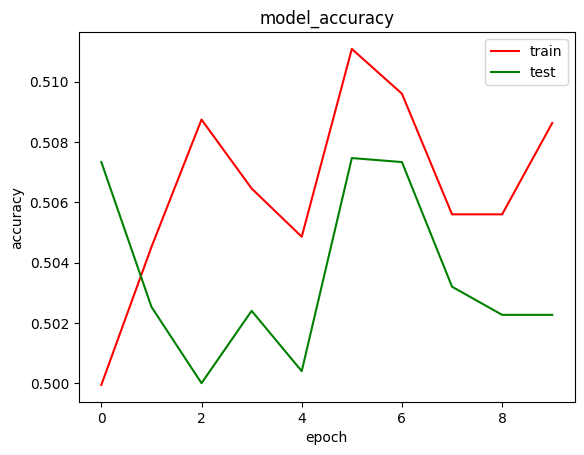

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='green')
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'])
plt.show()

#epochs v/s training accuracy and epochs v/s validation accuracy

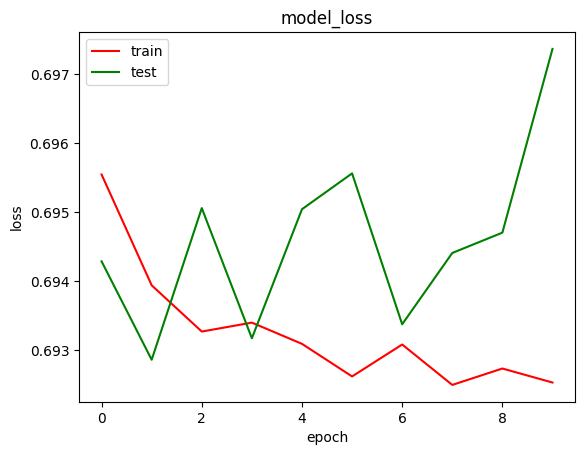

In [32]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='green')
plt.title("model_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'])

#epochs v/s training loss and epochs v/s vlidation loss